In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt

## Parameters

In [2]:
use_clusters = [
    'CA3 Cadm2', 'CA1 Chrm3', 'CA3-St18 Tead1', 'Gfra1 Gfra1', 'IT-L5 Etv1',
    'CA1 Ptprg', 'NP-L6 Cntnap4', 'CA3-St18 Nuak1', 'CT-L6 Megf9',
    'IG-CA2 Chrm3', 'IG-CA2 Peak1', 'DG-po Calb2', 'DG dg-all', 'CA1 Kif26a',
    'CA3 Efnb2', 'CA1 Ak5', 'DG-po Bcl11a', 'PT-L5 Tenm2', 'CA1 Lingo2',
    'CA3-St18 Epha5', 'IG-CA2 Xpr1', 'DG-po Kctd8', 'CT-L6 Il1rap',
    'L6b Adcy8', 'IT-L6 Man1c1', 'NP-L6 Olfml2b', 'PT-L5 Abca12',
    'PT-L5 Nectin1', 'IT-L23 Cux1', 'IT-L23 Foxp1', 'IT-L4 Shc3', 'IT-L5 Cdh8',
    'IT-L5 Grik3', 'PT-L5 Tmtc2', 'IT-L23 Tenm2', 'NP-L6 Cntnap5a',
    'CT-L6 Hcrtr2', 'PT-L5 Plcb4', 'IT-L23 Ptprt', 'CT-L6 Map4', 'NP-L6 Boc',
    'PT-L5 Kcnh1', 'OLF-Exc Bmpr1b', 'PT-L5 Astn2', 'IT-L6 Fstl4',
    'CLA Bcl11a', 'NP-L6 Cyp7b1', 'CLA Cdh8', 'IT-L6 Cadps2', 'PT-L5 Ptprt',
    'NP-L6 Kcnab1', 'IT-L6 Oxr1', 'OLF-Exc Pld5', 'OLF-Exc Lrrtm3',
    'OLF-Exc Cdh9', 'OLF-Exc Unc13c', 'L6b Nrp2', 'OLF-Exc Sgcd',
    'OLF-Exc Rmst', 'PT-L5 Unc5b', 'L6b Pkhd1', 'L6b Kcnk2', 'IT-L4 Astn2',
    'CLA Nrp2', 'EP Tspan5', 'OLF-Exc Cux2', 'EP Rgs8', 'EP Adcy8'
]
auroc_cutoff = 0.9
fc_cutoff = 2
delta_cutoff = 0.01
rate_to_min = 0.01
rate_from_max = 0.01
n_repeat_pairs = 2

In [3]:
# Parameters
use_clusters = ["MGE-Sst Rxra", "Unc5c Unc5c", "MGE-Sst Ptpre", "CGE-Lamp5 Dock5", "CGE-Vip Ntng1", "CGE-Vip Ptprm", "CGE-Vip Robo1", "MGE-Pvalb Gfra2", "PAL-Inh Meis2", "MGE-Sst Unc5b", "MGE-Pvalb Thsd7a", "CGE-Vip Grm8", "MGE-Sst Dock4", "CGE-Lamp5 Grk5", "OLF Xkr6", "MSN-D2 Slc24a2", "CGE-Lamp5 Sorcs1", "MGE-Pvalb Entpd3", "MGE-Pvalb Ptprk", "CGE-Vip Ccser1", "CGE-Lamp5 Grid1", "MGE-Pvalb Sema5a", "MGE-Sst Kcnip4", "MGE-Sst Frmd6", "MGE-Pvalb Cnih3", "MGE-Sst Ubtd1", "MGE-Sst Rerg", "CGE-Vip Fstl4", "CGE-Vip Galnt17", "MGE-Sst Etv1", "CGE-Vip Clstn2", "CGE-Lamp5 Nrxn3", "MGE-Sst Chodl", "OLF Trpc4", "Foxp2 Homer2", "MGE-Pvalb Cacna1i", "MSN-D1 Khdrbs3", "MSN-D1 Plxnc1", "OLF Mapk10", "MSN-D1 Hrh1", "Foxp2 Trpc7", "OLF Pag1", "MSN-D2 Col14a1", "MGE-Sst Bmper", "OLF Gabbr2", "OLF Kcnd3", "PAL-Inh Deptor", "PAL-Inh Meis1", "LSX-Inh Cacna1i", "D1L-Fstl4 Sipa1l2", "PAL-Inh Rarb", "MSN-D2 Nrp2", "D1L-Fstl4 Trps1", "Foxp2 Dchs2", "PAL-Inh Chat", "D1L-PAL Flrt2", "PAL-Inh Igdcc3", "PAL-Inh Tmem178", "MSN-D1 Ntn1", "Foxp2 Inpp4b", "MSN-D2 Casz1", "Chd7 Kcnc2", "PAL-Inh Tcf7l2", "D1L-Fstl4 Grm3", "D1L-Fstl4 Cadm1", "Chd7 Trpc7", "PAL-Inh Ptprd", "D1L-Fstl4 Crim1", "Chd7 Megf11", "D1L-PAL Plcxd3", "PAL-Inh Onecut2", "LSX-Inh Foxp2", "LSX-Inh Enox1", "LSX-Inh Dock10", "LSX-Inh Nxph1", "LSX-Inh Zeb2", "LSX-Inh Lats2"]
auroc_cutoff = 0.8
fc_cutoff = 1
delta_cutoff = 0.005
#rate_to_min = 0.01
#rate_from_max = 0.01

n_repeat_pairs = 5


In [4]:
use_clusters = [i.replace('_', ' ') for i in use_clusters]
use_clusters = set(use_clusters)

In [5]:
subtype_rate = xr.open_dataset(
    '/home/hanliu/project/mouse_rostral_brain/study/mCClustermCLevel/SubType.geneslop2k.mcds'
)['gene_cluster_da_rate'].sel(mc_type='CHN').to_pandas()
subtype_rate.index = subtype_rate.index.map(lambda i: i.replace('_', ' '))
subtype_rate.head()

geneslop2k,ENSMUSG00000102693.1,ENSMUSG00000064842.1,ENSMUSG00000051951.5,ENSMUSG00000102851.1,ENSMUSG00000103377.1,ENSMUSG00000104017.1,ENSMUSG00000103025.1,ENSMUSG00000089699.1,ENSMUSG00000103201.1,ENSMUSG00000103147.1,...,ENSMUSG00000064363.1,ENSMUSG00000064364.1,ENSMUSG00000064365.1,ENSMUSG00000064366.1,ENSMUSG00000064367.1,ENSMUSG00000064368.1,ENSMUSG00000064369.1,ENSMUSG00000064370.1,ENSMUSG00000064371.1,ENSMUSG00000064372.1
SubType,,,,,,,,,,,,,,,,,,,,,
MGE-Sst Rxra,0.036028,0.043546,0.011518,0.012793,0.008664,0.013207,0.013343,0.012206,0.012409,0.012589,...,0.032261,0.032288,0.032410,0.032552,0.034254,0.033398,0.033502,0.033819,0.035191,0.035211
CA3 Cadm2,0.033156,0.029851,0.009630,0.008696,0.009502,0.010312,0.009555,0.009374,0.009898,0.008947,...,0.025086,0.025137,0.025251,0.025495,0.024930,0.024434,0.024452,0.024956,0.024893,0.024863
CA1 Chrm3,0.023127,0.024722,0.008233,0.008266,0.009479,0.012860,0.007963,0.008021,0.009220,0.007640,...,0.033007,0.032922,0.032910,0.033188,0.031894,0.030501,0.029690,0.029887,0.029790,0.029634
CA3-St18 Tead1,0.027134,0.027768,0.017092,0.013822,0.024804,0.040937,0.015322,0.014494,0.019728,0.011044,...,0.034665,0.034462,0.034645,0.034727,0.033429,0.031014,0.029844,0.029497,0.029236,0.029461
Unc5c Unc5c,0.024149,0.030352,0.011801,0.010621,0.010696,0.014942,0.021727,0.013943,0.014074,0.009287,...,0.032325,0.032111,0.031888,0.031687,0.029979,0.029032,0.028236,0.028392,0.025932,0.026097


## Total DMG results

In [6]:
total_dmg = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusterMethylMarker/InhSubTypePairwiseMarker/TotalPairwiseMarker.msg'
)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
use_dmg = total_dmg[total_dmg['cluster_from'].isin(use_clusters) & 
                    total_dmg['cluster_to'].isin(use_clusters) & 
                    (total_dmg['AUROC'] > auroc_cutoff)].copy()
use_dmg.shape

(5479479, 11)

In [8]:
use_dmg['rate_from'] = use_dmg.apply(lambda i: subtype_rate.at[i['cluster_from'], i['gene_id']], axis=1)
use_dmg['rate_to'] = use_dmg.apply(lambda i: subtype_rate.at[i['cluster_to'], i['gene_id']], axis=1)

In [9]:
fc = use_dmg['rate_to'] / use_dmg['rate_from']
delta = use_dmg['rate_to'] - use_dmg['rate_from']
use_dmg = use_dmg[(fc > fc_cutoff) & 
                  (delta > delta_cutoff) #&
                  #(use_dmg['rate_to'] > rate_to_min) & 
                  #(use_dmg['rate_from'] < rate_from_max)
                 ].copy()
use_dmg.shape

(4500501, 13)

In [10]:
repeat_counts = use_dmg['gene_id'].value_counts()
# before direction filter, real gene should be larger than n_repeat_pairs
use_genes = repeat_counts[repeat_counts > n_repeat_pairs].index
use_dmg = use_dmg[use_dmg['gene_id'].isin(use_genes)]
use_dmg.shape

(4490367, 13)

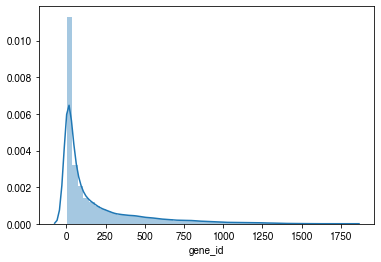

In [11]:
sns.distplot(repeat_counts)

In [12]:
use_dmg.to_msgpack('RelatedDMG.msg')

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: to_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  """Entry point for launching an IPython kernel.


In [13]:
with open('related_dmgs.txt', 'w') as f:
    for g in use_dmg['gene_id'].unique():
        f.write(g + '\n')
use_dmg['gene_id'].unique().size

19488

In [14]:
use_dmg.shape

(4490367, 13)

In [15]:
use_dmg['gene_id'].value_counts().describe()

count    19488.000000
mean       230.417026
std        287.665226
min          6.000000
25%         32.000000
50%        106.000000
75%        323.000000
max       1791.000000
Name: gene_id, dtype: float64

In [16]:
use_dmg[(use_dmg['gene_name'] == 'Bcl11b')
        & (use_dmg['cluster_from'] == 'MGE-Sst Unc5b') &
        (use_dmg['cluster_to'] == 'MGE-Sst Ptpre')]

,-lgp,AUROC,cluster_from,cluster_from_rate,cluster_to,cluster_to_rate,gene_id,gene_name,pvals_adj,log2fc,delta,rate_from,rate_to
80,23.195374,0.85737,MGE-Sst Unc5b,0.837923,MGE-Sst Ptpre,2.173522,ENSMUSG00000048251.15,Bcl11b,6.377142e-24,-1.375145,-1.335599,0.023735,0.066541
